<a href="https://colab.research.google.com/github/DeepBhattarai/Machine_Learning/blob/main/Taxi_trip_ML_function_version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install scikit-learn

In [2]:
#imports necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [4]:

url = 'https://raw.githubusercontent.com/DeepBhattarai/Machine_Learning/refs/heads/main/taxi_trip_pricing.csv' #url location of the file

df1 = pd.read_csv(url) #read the csv file and converts it to pandas dataframe (df)

df1.head() #provides the first five rows of the dataframe

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


## Data Preprocessing and cleaning

In [5]:
df1.shape #gives the rows and column of df

(1000, 11)

In [6]:
df1.info() #provides the summary info of the datframe,datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [7]:
duplicate_data = df1[df1.duplicated()]
print(duplicate_data.any()) #provides if there is any duplicates in the df

Trip_Distance_km         False
Time_of_Day              False
Day_of_Week              False
Passenger_Count          False
Traffic_Conditions       False
Weather                  False
Base_Fare                False
Per_Km_Rate              False
Per_Minute_Rate          False
Trip_Duration_Minutes    False
Trip_Price               False
dtype: bool


In [8]:
df1.isnull().sum() #provides if there is any null values in the dataframe

,0
Trip_Distance_km,50
Time_of_Day,50
Day_of_Week,50
Passenger_Count,50
Traffic_Conditions,50
Weather,50
Base_Fare,50
Per_Km_Rate,50
Per_Minute_Rate,50
Trip_Duration_Minutes,50


In [9]:
df2 = df1.dropna()
df2.isnull().sum()
df2.count()          #drops the null values(rows) from the dataframe

,0
Trip_Distance_km,562
Time_of_Day,562
Day_of_Week,562
Passenger_Count,562
Traffic_Conditions,562
Weather,562
Base_Fare,562
Per_Km_Rate,562
Per_Minute_Rate,562
Trip_Duration_Minutes,562


In [10]:
df1.describe() #provides the summary statistics for the df

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [11]:
#fills the missing values in the column with float64 datatypes

df1['Trip_Distance_km'] = df1['Trip_Distance_km'].fillna(df1['Trip_Distance_km'].mean())
df1['Passenger_Count']= df1['Passenger_Count'].fillna(round(df1['Passenger_Count'].mean()))
df1['Base_Fare'] = df1['Base_Fare'].fillna(df1['Base_Fare'].mean())
df1['Per_Km_Rate'] = df1['Per_Km_Rate'].fillna(df1['Per_Km_Rate'].mean())
df1['Per_Minute_Rate'] = df1['Per_Minute_Rate'].fillna(df1['Per_Minute_Rate'].mean())
df1['Trip_Duration_Minutes'] = df1['Trip_Duration_Minutes'].fillna(df1['Trip_Duration_Minutes'].mean())
df1['Trip_Price'] = df1['Trip_Price'].fillna(df1['Trip_Price'].mean())

In [12]:
df1.isnull().sum() #provides info on the null objects

,0
Trip_Distance_km,0
Time_of_Day,50
Day_of_Week,50
Passenger_Count,0
Traffic_Conditions,50
Weather,50
Base_Fare,0
Per_Km_Rate,0
Per_Minute_Rate,0
Trip_Duration_Minutes,0


In [13]:
df1.dropna(inplace=True) #this ensures the df is updated after above alterations

In [14]:
df1.isnull().sum()

,0
Trip_Distance_km,0
Time_of_Day,0
Day_of_Week,0
Passenger_Count,0
Traffic_Conditions,0
Weather,0
Base_Fare,0
Per_Km_Rate,0
Per_Minute_Rate,0
Trip_Duration_Minutes,0


In [15]:
df1.count() #counts the entries(rows) of the dataframe

,0
Trip_Distance_km,811
Time_of_Day,811
Day_of_Week,811
Passenger_Count,811
Traffic_Conditions,811
Weather,811
Base_Fare,811
Per_Km_Rate,811
Per_Minute_Rate,811
Trip_Duration_Minutes,811


## **Exploratory data analysis**

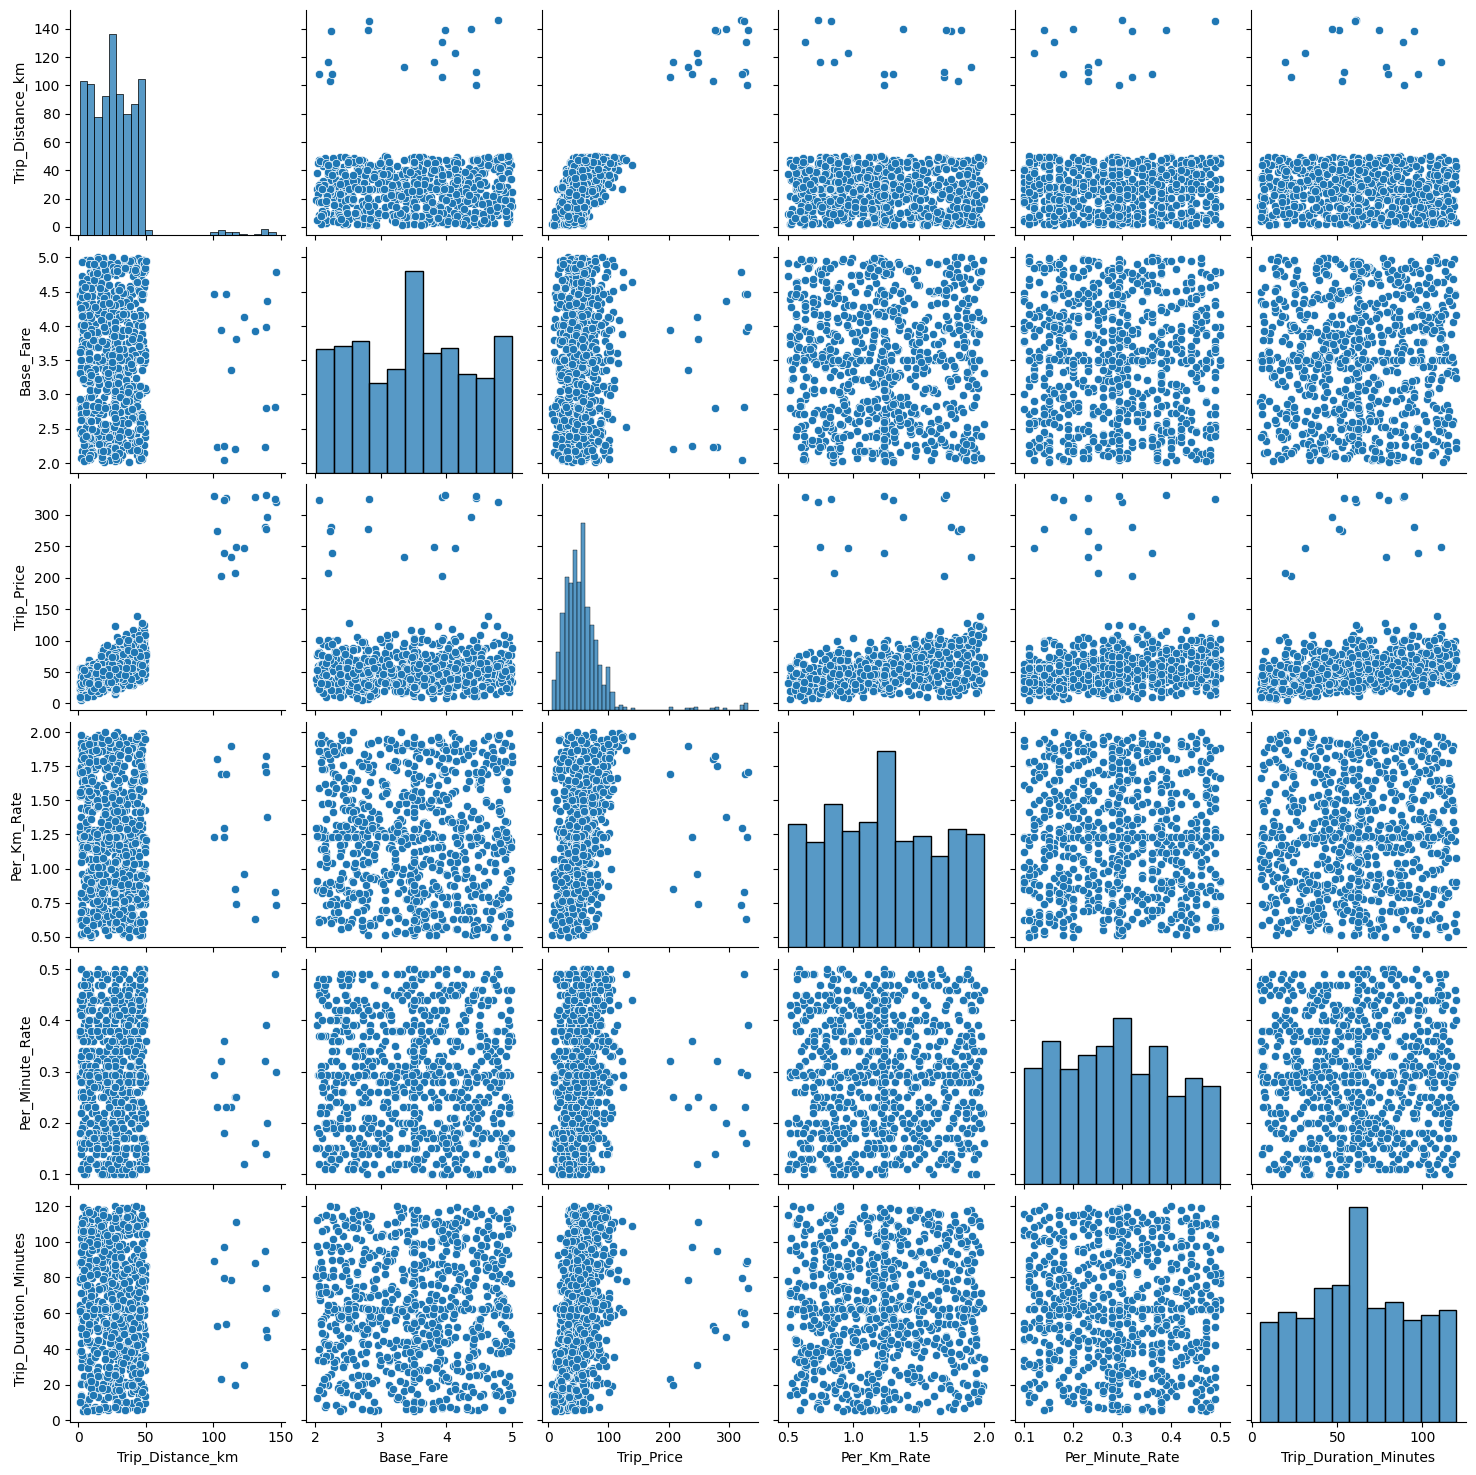

In [16]:
#provides the graphical distribution and correlation of the datas
sns.pairplot(df1[['Trip_Distance_km','Base_Fare','Trip_Price','Per_Km_Rate','Per_Minute_Rate','Trip_Duration_Minutes']])

In [17]:
#provides correlation matrix
df1[['Trip_Price','Base_Fare','Trip_Distance_km','Per_Km_Rate','Per_Minute_Rate','Trip_Duration_Minutes']].corr()

,Trip_Price,Base_Fare,Trip_Distance_km,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
Trip_Price,1.000000,0.026285,0.833846,0.248681,0.109352,0.219064
Base_Fare,0.026285,1.000000,0.018987,0.017023,-0.030323,0.034684
Trip_Distance_km,0.833846,0.018987,1.000000,-0.031719,-0.046357,-0.014432
Per_Km_Rate,0.248681,0.017023,-0.031719,1.000000,0.020760,0.043719
Per_Minute_Rate,0.109352,-0.030323,-0.046357,0.020760,1.000000,-0.007651
Trip_Duration_Minutes,0.219064,0.034684,-0.014432,0.043719,-0.007651,1.000000


from matplotlib import pyplot as plt
_df_0['Trip_Price'].plot(kind='hist', bins=20, title='Trip_Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Base_Fare'].plot(kind='hist', bins=20, title='Base_Fare')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Trip_Distance_km'].plot(kind='hist', bins=20, title='Trip_Distance_km')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Per_Km_Rate'].plot(kind='hist', bins=20, title='Per_Km_Rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Trip_Price', y='Base_Fare', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Base_Fare', y='Trip_Distance_km', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Trip_Distance_km', y='Per_Km_Rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Per_Km_Rate', y='Per_Minute_Rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Trip_Price'].plot(kind='line', figsize=(8, 4), title='Trip_Price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Base_Fare'].plot(kind='line', figsize=(8, 4), title='Base_Fare')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Trip_Distance_km'].plot(kind='line', figsize=(8, 4), title='Trip_Distance_km')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Per_Km_Rate'].plot(kind='line', figsize=(8, 4), title='Per_Km_Rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Trip_Price'].plot(kind='hist', bins=20, title='Trip_Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Base_Fare'].plot(kind='hist', bins=20, title='Base_Fare')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Trip_Distance_km'].plot(kind='hist', bins=20, title='Trip_Distance_km')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Per_Km_Rate'].plot(kind='hist', bins=20, title='Per_Km_Rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_16.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='Trip_Price', y='Base_Fare', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='Base_Fare', y='Trip_Distance_km', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='Trip_Distance_km', y='Per_Km_Rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='Per_Km_Rate', y='Per_Minute_Rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21['Trip_Price'].plot(kind='line', figsize=(8, 4), title='Trip_Price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['Base_Fare'].plot(kind='line', figsize=(8, 4), title='Base_Fare')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_23['Trip_Distance_km'].plot(kind='line', figsize=(8, 4), title='Trip_Distance_km')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_24['Per_Km_Rate'].plot(kind='line', figsize=(8, 4), title='Per_Km_Rate')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='Trip_Price', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='Base_Fare', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='Trip_Distance_km', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_28['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_28, x='Per_Km_Rate', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [18]:
'''After analysisng pairplot and correlation matrix in a raw data we can say that there is a strong correlation
between Trip_Price and Trip_Distance_km. Also there is mild positive correlation between Trip_Price and
Per_Km_Rate,Trip_Duration_Minutes respectively.'''

'After analysisng pairplot and correlation matrix in a raw data we can say that there is a strong correlation\nbetween Trip_Price and Trip_Distance_km. Also there is mild positive correlation between Trip_Price and\nPer_Km_Rate,Trip_Duration_Minutes respectively.'

<Axes: >

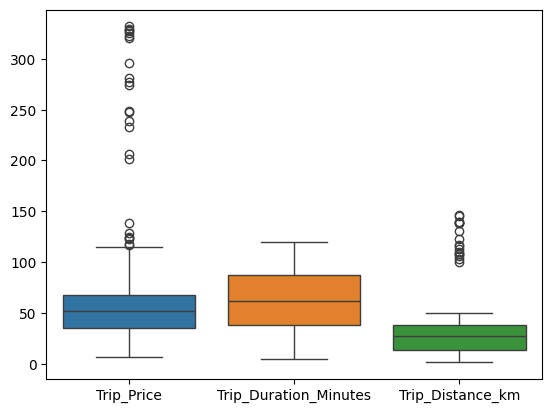

In [19]:
#helps to visualize and identify outlies
sns.boxplot(data= df1[['Trip_Price','Trip_Duration_Minutes','Trip_Distance_km']])

In [20]:
 sk =df1['Trip_Price'].skew() #measures the skewness of the data
print(sk) #(if skew==0;symmetric, if skew<0;negative skew, if skew>0;positive skew)

3.9184181987826125


In [21]:
df1['Trip_Distance_km'].skew()

2.3631579670484952

<Axes: >

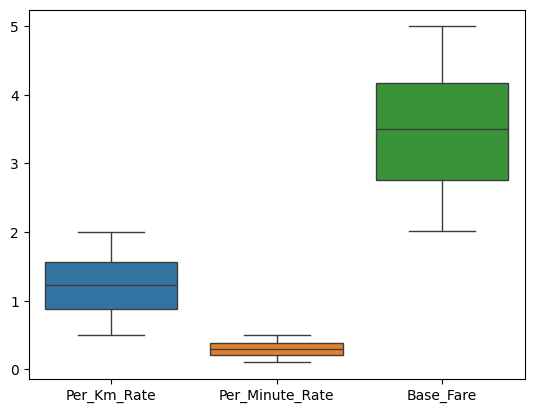

In [22]:
sns.boxplot(data = df1[['Per_Km_Rate','Per_Minute_Rate','Base_Fare']])

<Axes: >

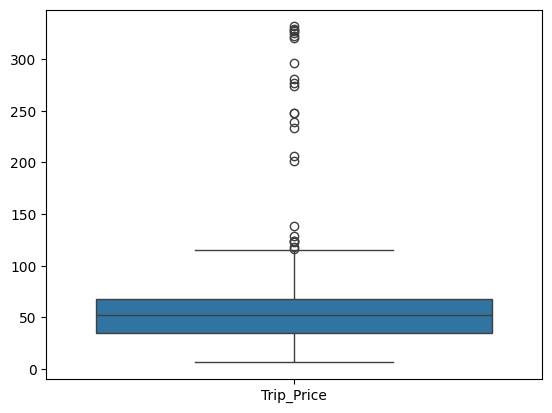

In [23]:
sns.boxplot(df1[['Trip_Price']])

In [24]:
#function for applying log transformation
def log_transform(x):
    for i in range(df1.shape[0]):
        new_value = np.log(x)
    return new_value

In [25]:
df1['Log_Trip_Price'] = df1['Trip_Price'].apply(log_transform)

In [26]:
df1.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Log_Trip_Price
0,19.350000,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.32,53.82,36.262400,3.590781
1,47.590000,Afternoon,Weekday,1.0,High,Clear,3.502989,0.62,0.43,40.57,56.874773,4.040852
2,36.870000,Evening,Weekend,1.0,High,Clear,2.700000,1.21,0.15,37.27,52.903200,3.968464
4,27.070547,Evening,Weekday,3.0,High,Clear,2.930000,0.63,0.32,22.64,15.618000,2.748424
5,8.640000,Afternoon,Weekend,2.0,Medium,Clear,2.550000,1.71,0.48,89.33,60.202800,4.097719


<Axes: xlabel='Trip_Price', ylabel='Count'>

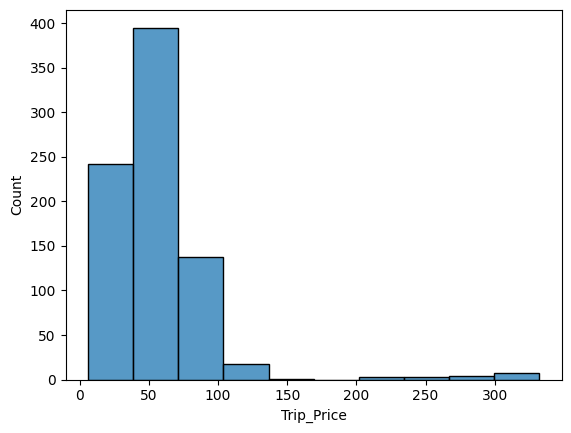

In [27]:
#helps to see data distribution
sns.histplot(df1['Trip_Price'],bins=10)

<Axes: >

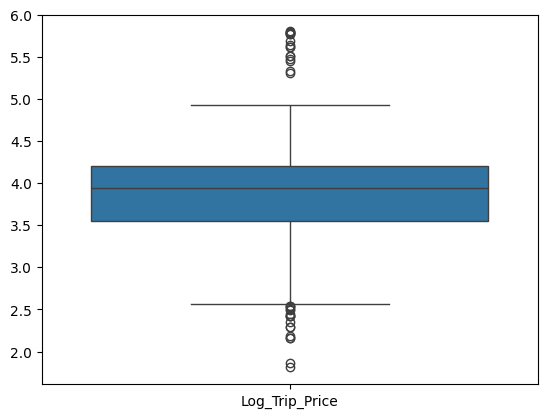

In [28]:
sns.boxplot(df1[['Log_Trip_Price']])

<Axes: xlabel='Log_Trip_Price', ylabel='Count'>

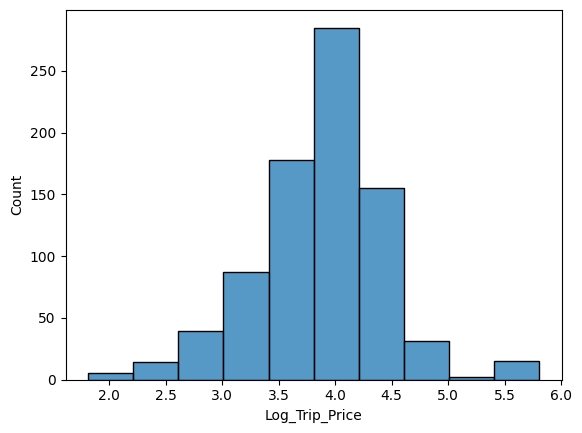

In [29]:
sns.histplot(df1['Log_Trip_Price'],bins=10)

In [30]:
#another way of applying log transformation
df1['log_Trip_Distance_km'] = df1['Trip_Distance_km'].apply(lambda x: np.log(x))

In [31]:
df1.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price,Log_Trip_Price,log_Trip_Distance_km
0,19.350000,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.32,53.82,36.262400,3.590781,2.962692
1,47.590000,Afternoon,Weekday,1.0,High,Clear,3.502989,0.62,0.43,40.57,56.874773,4.040852,3.862623
2,36.870000,Evening,Weekend,1.0,High,Clear,2.700000,1.21,0.15,37.27,52.903200,3.968464,3.607398
4,27.070547,Evening,Weekday,3.0,High,Clear,2.930000,0.63,0.32,22.64,15.618000,2.748424,3.298446
5,8.640000,Afternoon,Weekend,2.0,Medium,Clear,2.550000,1.71,0.48,89.33,60.202800,4.097719,2.156403


Text(0, 0.5, 'Count')

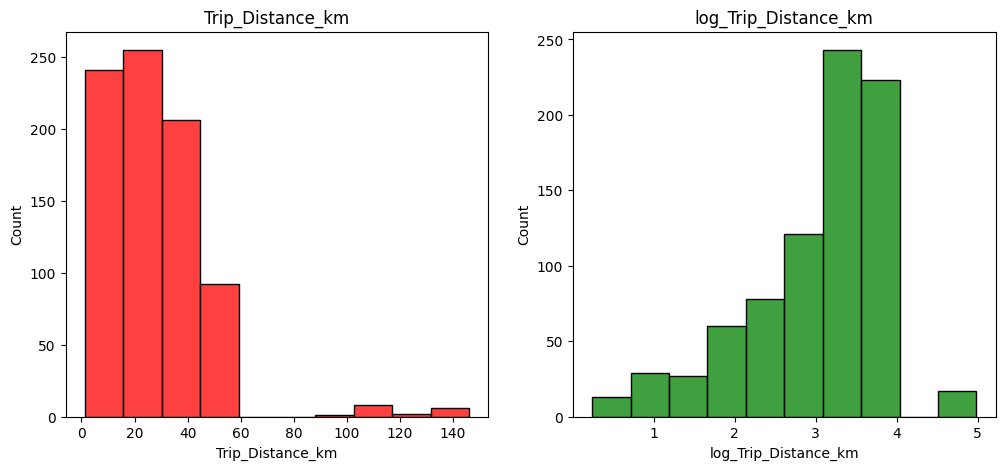

In [32]:
# creating subplots for simultaneous comparison
fig,axes = plt.subplots(1,2,figsize = (12,5))

sns.histplot(df1['Trip_Distance_km'], bins = 10, kde = False, color = 'Red', ax = axes[0])
axes[0].set_title('Trip_Distance_km')
axes[0].set_xlabel('Trip_Distance_km')
axes[0].set_ylabel('Count')

sns.histplot(df1['log_Trip_Distance_km'], bins = 10, kde = False, color = 'green', ax = axes[1])
axes[1].set_title('log_Trip_Distance_km')
axes[1].set_xlabel('log_Trip_Distance_km')
axes[1].set_ylabel('Count')



## SGDR algorithm

In [33]:
# extracting only the features applicable to linear regressor from df1 and creating new df2
df2 = df1[['Trip_Price','Trip_Distance_km','Base_Fare','Per_Km_Rate','Per_Minute_Rate','Trip_Duration_Minutes']]
pca_df = df1[['Trip_Price','Trip_Distance_km','Base_Fare','Per_Km_Rate','Per_Minute_Rate','Trip_Duration_Minutes']]

In [34]:
df2.head(5)


,Trip_Price,Trip_Distance_km,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes
0,36.262400,19.350000,3.560000,0.80,0.32,53.82
1,56.874773,47.590000,3.502989,0.62,0.43,40.57
2,52.903200,36.870000,2.700000,1.21,0.15,37.27
4,15.618000,27.070547,2.930000,0.63,0.32,22.64
5,60.202800,8.640000,2.550000,1.71,0.48,89.33


In [35]:
pca_df.head(5)
pca_df.shape

(811, 6)

In [36]:
df2.count()

,0
Trip_Price,811
Trip_Distance_km,811
Base_Fare,811
Per_Km_Rate,811
Per_Minute_Rate,811
Trip_Duration_Minutes,811


In [37]:
X = df2[['Trip_Distance_km','Base_Fare','Per_Km_Rate','Per_Minute_Rate','Trip_Duration_Minutes']]
y = df2['Trip_Price']

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stocha

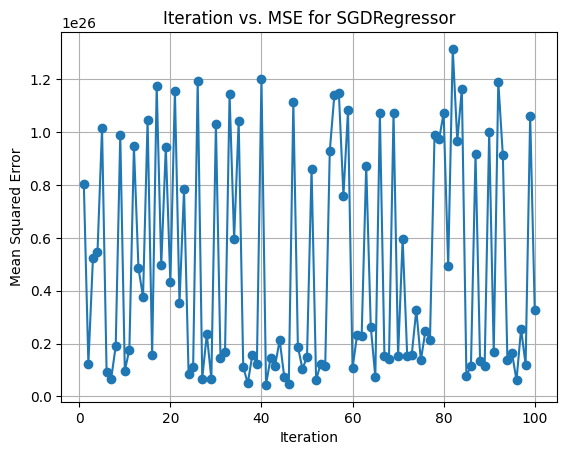

In [39]:
sgd_regressor = SGDRegressor(max_iter = 1, tol = 1e-3,warm_start = True, random_state=42)

iteration = 100
mse_value = []

for i in range(iteration):
  sgd_regressor = sgd_regressor.fit(X_train,y_train)
  y_pred = sgd_regressor.predict(X_test)
  mse = mean_squared_error(y_test,y_pred)
  mse_value.append(mse)

plt.plot(range(1, iteration + 1), mse_value, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Iteration vs. MSE for SGDRegressor')
plt.grid()
plt.show()

In [148]:
iteration = iter
learning_rate = l
def regressor_sgd(X1,X2,y1,y2,iter,l):


  mse_value = []
  y_pred_list = []
  for j in range(len(l)):
    sgd_regressor = SGDRegressor(max_iter = 1, tol = 1e-3,warm_start = True,alpha=0.1,eta0=l[j],random_state=42)
    mse_value_l =[]
    for i in range(iteration):
        sgd_regressor = sgd_regressor.fit(X1,y1)
        y_pred = sgd_regressor.predict(X2)
        mse = mean_squared_error(y2,y_pred)
        mse_value_l.append(mse)
        y_pred_list.append(y_pred)
    mse_value.append(mse_value_l)


  fig,axes = plt.subplots(1,2,figsize=(10,5))
  axes[0].plot(range(1,iteration+1),mse_value[0],marker = 'o',label=f'learning_rate={l[0]}')
  axes[0].set_xlabel('Iteration')
  axes[0].set_ylabel('Mean Squared Error')
  axes[0].set_title('Iteration vs. MSE for SGDRegressor')
  axes[0].legend()
  axes[0].grid()

  axes[1].plot(range(1,iteration+1),mse_value[1],marker = 'o',label=f'learning_rate={l[1]}')
  axes[1].set_xlabel('Iteration')
  axes[1].set_ylabel('Mean Squared Error')
  axes[1].set_title('Iteration vs. MSE for SGDRegressor')
  axes[1].legend()
  axes[1].grid()




  '''
  for i in range(len(l)):
    plt.subplot(1,1,i+1)
    plt.plot(range(1,iteration+1),mse_value[i],marker = 'o',label=f'learning_rate={l[i]}')


  plt.show()
  plt.tight_layout()

  return y_pred

'''
def main():
  X1 = X_train
  X2 = X_test
  y1 = y_train
  y2 = y_test
  iter = iteration
  l = learning_rate
  regressor_sgd(X1,X2,y1,y2,iter,l)






Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/py

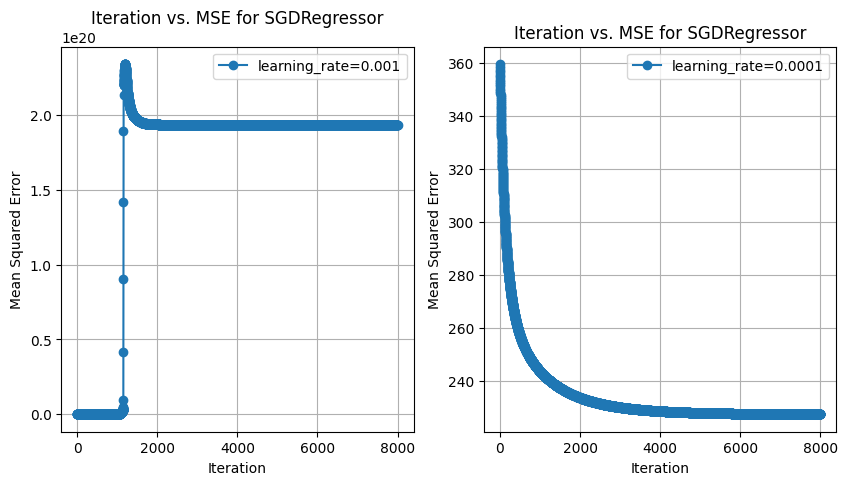

In [152]:
'''
l = [0.1,0.01]
iteration = 20
sgd_regressor_norm = regressor_sgd(X_train,X_test,y_train,y_test,iter,l)
'''
l = [0.001,0.0001]
iteration = 8000
sgd_regressor_2 = regressor_sgd(X_train,X_test,y_train,y_test,iter,l)

In [42]:

print(mse)

3.2762800249081015e+25


In [43]:
'''def main():
  sgd_regressor = SGDRegressor(max_iter = 1, tol = 1e-3,warm_start = True, random_state=42)
  '''

def regressor_sgd(X1,X2,y1,y2,iter,l):

  iteration = iter
  mse_value = []
  y_pred_list = []
  for j in range(len(l)):
    sgd_regressor = SGDRegressor(max_iter = 1, tol = 1e-3,warm_start = True,alpha=0.1,eta0=l[j],random_state=42)
    mse_value_l =[]
    for i in range(iteration):
        sgd_regressor = sgd_regressor.fit(X1,y1)
        y_pred = sgd_regressor.predict(X2)
        mse = mean_squared_error(y2,y_pred)
        mse_value_l.append(mse)
        y_pred_list.append(y_pred)
    mse_value.append(mse_value_l)

  #print(min(mse_value))
  plt.figure(figsize=(10,6))
  for i in range(len(l)):
    plt.plot(range(1,iteration+1),mse_value[i],marker = 'o',label=f'learning_rate={l[i]}')
  plt.xlabel('Iteration')
  plt.ylabel('Mean Squared Error')
  plt.title('Iteration vs. MSE for SGDRegressor')
  plt.legend()
  plt.grid()
  plt.show()

  return y_pred
#regressor_sgd(X_train,X_test,y_train,y_test,10)

if __name__ == '__regressor_sgd__':
  regressor_sgd(X1,X2,y1,y2,iter,l)

In [44]:

print(mse)

3.2762800249081015e+25


In [45]:
b = sgd_regressor.intercept_
w = sgd_regressor.coef_
print(b)
print(w)

[1.3929209e+11]
[-6.04490037e+10 -2.87197275e+11  8.38148420e+10  6.12778819e+10
  1.05158541e+11]


In [46]:
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stocha

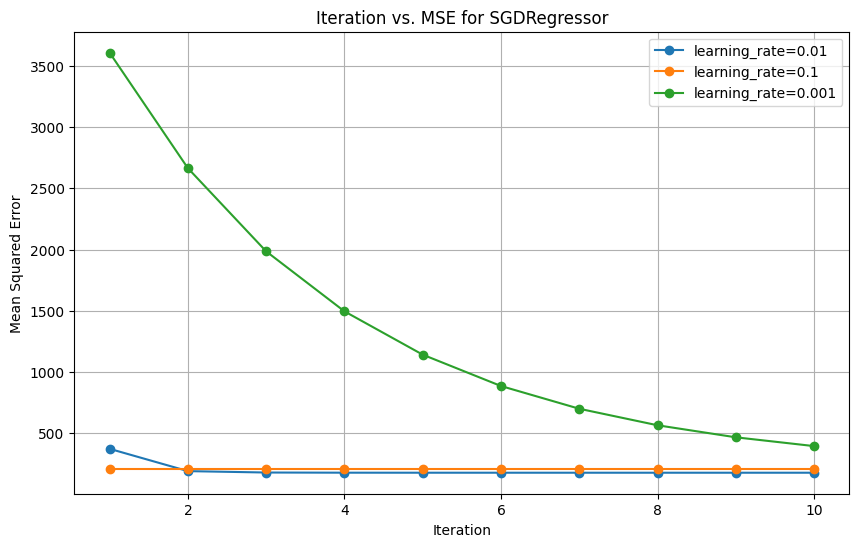

In [47]:
l = [0.01,0.1,0.001]
sgd_regressor_norm = regressor_sgd(X_train_norm,X_test_norm,y_train,y_test,10,l)

In [48]:
b_norm = sgd_regressor.intercept_
w_norm = sgd_regressor.coef_
print(b_norm)
print(w_norm)

[1.3929209e+11]
[-6.04490037e+10 -2.87197275e+11  8.38148420e+10  6.12778819e+10
  1.05158541e+11]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stocha

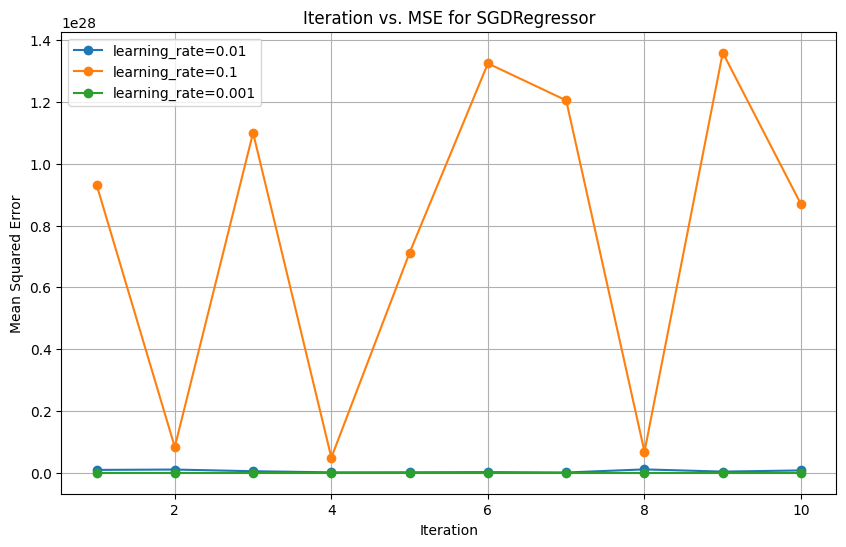

-1.3543045700885967
-1.3543045700885963


In [49]:
from sklearn.metrics import r2_score
new_pred = (regressor_sgd(X_train,X_test,y_train,y_test,10,l))
reshaped_new_pred = new_pred.reshape(-1,1)
reshaped_y_test = y_test.to_numpy().reshape(-1,1)
scaler = StandardScaler()
y_pred_norm = scaler.fit_transform(reshaped_new_pred)
y_test_norm = scaler.transform(reshaped_y_test)
r2_score_norm = r2_score(y_test_norm,y_pred_norm)
print(r2_score_norm)

r2_score_raw = r2_score(y_test,new_pred)
print(r2_score_raw)

#polynomial fit

In [50]:
def poly_regressor(X1,X2,y1,y2,iter,l):

  mse_value=[]

  for j in range(len(l)):
    poly_sgd_model = SGDRegressor(max_iter=1,tol=1e-3,warm_start=True,penalty='l2',alpha =0.1,eta0=l[j],random_state=42)
    mse_value_l= []
    for i in range(iter):
      poly_sgd_model = poly_sgd_model.fit(X1,y1)
      y_pred = poly_sgd_model.predict(X2)
      Mse = mean_squared_error(y2,y_pred)
      mse_value_l.append(Mse)
    mse_value.append(mse_value_l)
    print(mse_value)
  plt.figure(figsize=(10,6))
  for i in range(len(mse_value)):
    plt.plot(range(1, iter + 1), mse_value[i], marker='o',label=f'Learning_rate={l[i]}')

    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error')
    plt.title('Iteration vs. MSE for SGDRegressor')
    plt.legend()
    plt.grid()

if __name__ == '__poly_regressor__':
  poly_regressor(X1,X2,y1,y2,iter)

[[2.1203218864434916e+50, 8.892227377687765e+49, 2.3434256521492464e+49, 2.8438937290404495e+50, 4.6350782450954974e+49, 2.2140517062226248e+49, 1.261889316675829e+50, 5.36117425111467e+48, 7.171421955357362e+49, 4.276675357964697e+49]]
[[2.1203218864434916e+50, 8.892227377687765e+49, 2.3434256521492464e+49, 2.8438937290404495e+50, 4.6350782450954974e+49, 2.2140517062226248e+49, 1.261889316675829e+50, 5.36117425111467e+48, 7.171421955357362e+49, 4.276675357964697e+49], [6.804759365959923e+50, 6.498803917439964e+50, 6.368174224982552e+50, 6.4716481627747815e+50, 1.004163063984388e+52, 5.798496203487415e+50, 9.96483109204947e+51, 5.819048690614967e+50, 9.967349350238751e+51, 5.81837170815786e+50]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stocha

[[2.1203218864434916e+50, 8.892227377687765e+49, 2.3434256521492464e+49, 2.8438937290404495e+50, 4.6350782450954974e+49, 2.2140517062226248e+49, 1.261889316675829e+50, 5.36117425111467e+48, 7.171421955357362e+49, 4.276675357964697e+49], [6.804759365959923e+50, 6.498803917439964e+50, 6.368174224982552e+50, 6.4716481627747815e+50, 1.004163063984388e+52, 5.798496203487415e+50, 9.96483109204947e+51, 5.819048690614967e+50, 9.967349350238751e+51, 5.81837170815786e+50], [3.9583773537987175e+46, 4.853851842018003e+46, 4.435749882083482e+46, 1.7191252680170902e+47, 1.7060736243361347e+48, 1.0662169906281087e+48, 9.713250142817263e+47, 8.179834164099315e+47, 7.028951250606511e+46, 1.7651804858488708e+47]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


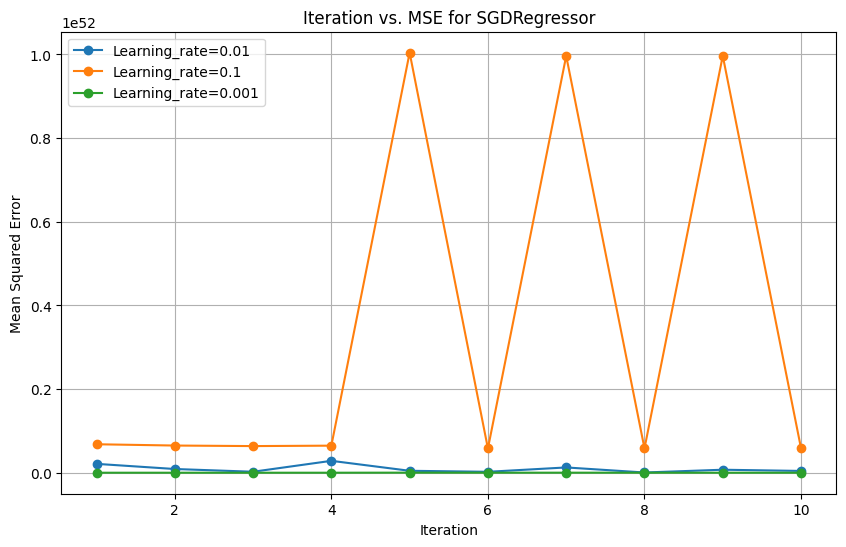

In [51]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 4)
x_train_poly = poly_features.fit_transform(X_train)
x_test_poly = poly_features.transform(X_test)
l = [0.01,0.1,0.001]
poly_regressor(x_train_poly,x_test_poly,y_train,y_test,10,l)



#Principal Component Analysis (PCA)

In [52]:
import numpy as np

# Using np.where to assign labels
pca_df['label'] = np.where(pca_df['Trip_Price'] < 20, 'Low',
                       np.where(pca_df['Trip_Price'] < 40, 'Medium', 'High'))

print(pca_df)


     Trip_Price  Trip_Distance_km  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0     36.262400         19.350000   3.560000     0.800000         0.320000   
1     56.874773         47.590000   3.502989     0.620000         0.430000   
2     52.903200         36.870000   2.700000     1.210000         0.150000   
4     15.618000         27.070547   2.930000     0.630000         0.320000   
5     60.202800          8.640000   2.550000     1.710000         0.480000   
..          ...               ...        ...          ...              ...   
995   34.404900          5.490000   2.390000     0.620000         0.490000   
996   62.129500         45.950000   3.120000     0.610000         0.292916   
997   33.123600          7.700000   2.080000     1.780000         0.292916   
998   61.209000         47.560000   2.670000     0.820000         0.170000   
999   45.443700         22.850000   4.340000     1.233316         0.230000   

     Trip_Duration_Minutes   label  
0                    53.82

<ipython-input-52-d25c4a98aa0c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_df['label'] = np.where(pca_df['Trip_Price'] < 20, 'Low',


<ipython-input-53-abb0698a605d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_df.dropna(inplace=True)


[[-0.40460114  0.08002664 -1.03334892  0.25949611 -0.27370137]
 [ 1.02208121  0.01288496 -1.46445985  1.24540762 -0.69955346]
 [ 0.48050774 -0.93280113 -0.05137404 -1.2641853  -0.80561474]
 ...
 [-0.99315813 -1.66297929  1.31381055  0.01674489 -0.26213105]
 [ 1.02056561 -0.96813233 -0.98544771 -1.08492866  1.690682  ]
 [-0.22778145  0.99863788  0.00446869 -0.54715875 -1.04923427]]
          PC1       PC2
0    0.297159 -0.607219
1    1.033463 -1.130172
2    1.140880 -0.435245
3    1.042715 -1.672820
4   -2.369469 -0.743839
..        ...       ...
806 -0.756853 -2.286148
807  1.333757 -0.559766
808 -1.324723 -0.990340
809  1.032078  0.664849
810  0.547898  0.227427

[811 rows x 2 columns]
          PC1       PC2   label
0    0.297159 -0.607219  Medium
1    1.033463 -1.130172    High
2    1.140880 -0.435245    High
3    1.042715 -1.672820     Low
4   -2.369469 -0.743839    High
..        ...       ...     ...
806 -0.756853 -2.286148  Medium
807  1.333757 -0.559766    High
808 -1.324723 -0

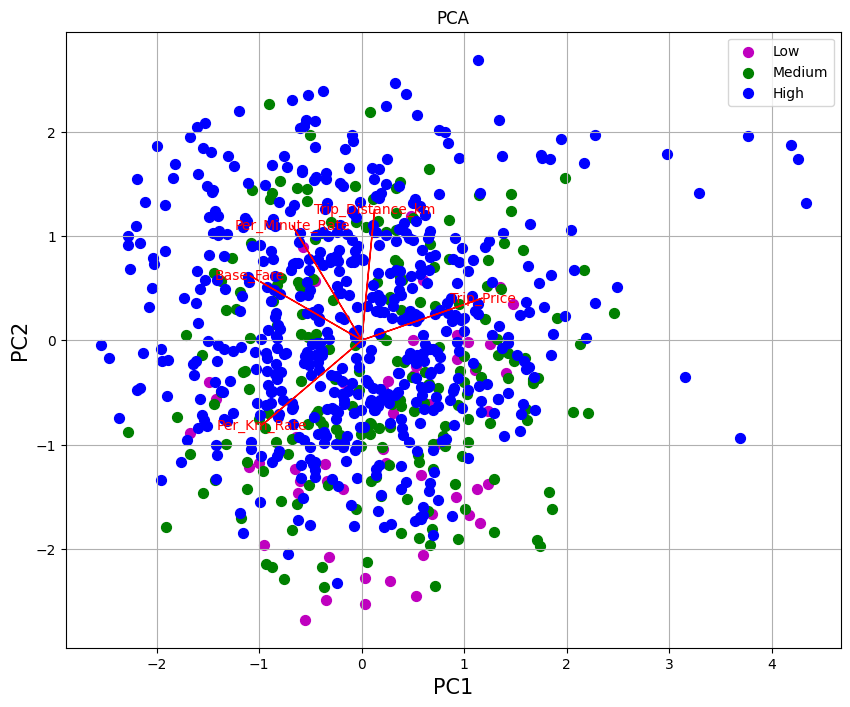

In [53]:
pca_df.dropna(inplace=True)
pca_df.count()
pca_df.head()
features = ['Trip_Distance_km','Base_Fare','Per_Km_Rate','Per_Minute_Rate','Trip_Duration_Minutes']
X = pca_df.loc[:,features].values
z = pca_df.loc[:,['label']].values
df7 = pd.DataFrame(data=z,columns=['label'])
x_scaled = StandardScaler().fit_transform(X)
print(x_scaled)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_scaled)
principal_df = pd.DataFrame(data=principal_components,columns=['PC1','PC2'])
print(principal_df)
finaldf = pd.concat([principal_df,df7],axis=1)
print(finaldf)
scores = principal_components
loadings = pca.components_.T
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('PC1',fontsize=15)
ax.set_ylabel('PC2',fontsize=15)
ax.set_title('2 Component PCA',fontsize=20)
targets = ['Low','Medium','High']
colors = ['m','g','b']
for target,color in zip(targets,colors):
  indicesToKeep = finaldf['label'] == target
  ax.scatter(finaldf.loc[indicesToKeep,'PC1'],finaldf.loc[indicesToKeep,'PC2'],c=color,s=50)
ax.legend(targets)
ax.grid()
labels=df2.columns
for i in range(loadings.shape[0]):
    plt.arrow(0, 0, loadings[i, 0]*2, loadings[i, 1]*2,
              head_width=0,fc='r', ec='r')
    plt.text(loadings[i, 0]*2, loadings[i, 1]*2, labels[i], color='r', ha='center', va='center')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.show()


# Random Section


In [54]:
!wget https://raw.githubusercontent.com/fanatic8/Machine_Learning/main/Taxi_database.ipynb


--2025-02-15 11:40:22--  https://raw.githubusercontent.com/fanatic8/Machine_Learning/main/Taxi_database.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3199 (3.1K) [text/plain]
Saving to: ‘Taxi_database.ipynb’

Taxi_database.ipynb 100%[===================>]   3.12K  --.-KB/s    in 0s      

2025-02-15 11:40:23 (39.5 MB/s) - ‘Taxi_database.ipynb’ saved [3199/3199]



In [55]:
%run Taxi_database.ipynb

In [56]:
print(pandas_to_database())

None
